To show this on kaggel please vist this url
https://www.kaggle.com/vinay22mittal/kernels 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
df_test=pd.read_csv("adult-test.csv")
df_train=pd.read_csv("adult-training.csv")
print(df_test.shape)
print(df_train.shape)

(16281, 1)
(32560, 15)


In [3]:
df_train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_test.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
column=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","gender",
        "capital_gain","capital_loss","hours_per_week","native_country","income_bracket"]
len(column)

15

In [6]:
df_train.columns=column
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_bracket'],
      dtype='object')

In [7]:
df_test=pd.read_csv("adult-test.csv",names=column)
df_test=df_test.drop(0)
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
df_test_org=df_test.copy()
df_train_org=df_train.copy()

In [9]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [10]:
df_test.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income_bracket     object
dtype: object

In test data set age is object.

In [11]:
df_test["age"]=df_test["age"].astype("int64")

# Data pre processing  
 1) Missing value 
 2) Feature Engineering

## 1. Missing  value Treatment

In [12]:
def aa(x):
    return x==' ?'

In [18]:
df_train.apply(aa).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64

In [14]:
df_train.apply(aa).mean()

age               0.000000
workclass         0.056388
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056603
relationship      0.000000
race              0.000000
gender            0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.017905
income_bracket    0.000000
dtype: float64

Missing data in percentage:
   - workclass= 5.6%
   - occupation=5.6%
   - native_country=1.7%

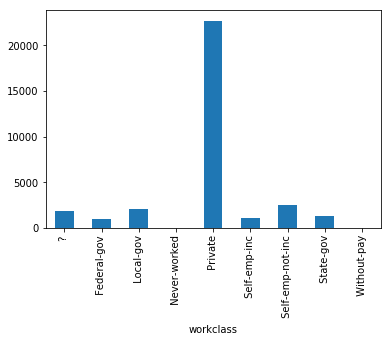

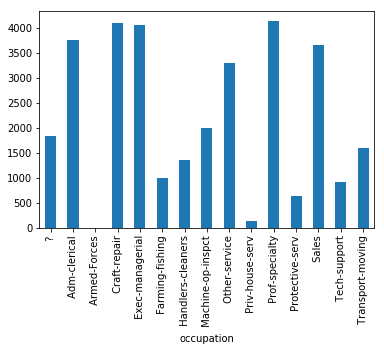

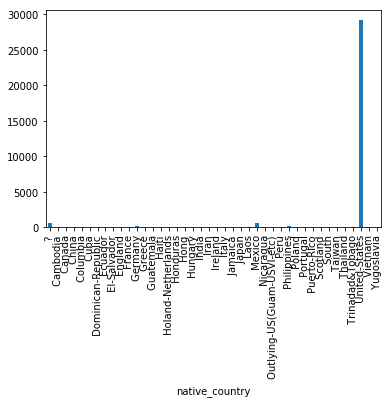

In [25]:
for variable in ["workclass","occupation","native_country"]:
    group=df_train.groupby([variable])
    group[variable].count().plot.bar()
    plt.show()

So we solved missing value by most frequent

In [35]:
df_train["workclass"].mode() 

0    Private
dtype: object

In [36]:
df_train["workclass"].replace(' ?'," Private",inplace=True)

In [37]:
df_train["native_country"].mode()

0    United-States
dtype: object

In [38]:
df_train["native_country"].replace(' ?'," United-States",inplace=True)

In [39]:
df_train["occupation"].mode()

0    Prof-specialty
dtype: object

In [40]:
df_train["occupation"].replace(' ?'," Prof-specialty",inplace=True)

In [41]:
df_train.apply(aa).mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income_bracket    0.0
dtype: float64

In [42]:
# test data set
df_test["workclass"].replace(' ?'," Private",inplace=True)
df_test["native_country"].replace(' ?'," United-States",inplace=True)
df_test["occupation"].replace(' ?'," Prof-specialty",inplace=True)
df_test.apply(aa).mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income_bracket    0.0
dtype: float64

## 2) Feature Engineering

in Data set have space so remove extra space

In [19]:
for col in df_train.columns:
    if df_train[col].dtype!= 'int64':
        #print(col)
        df_train[col]=df_train[col].apply(lambda x: x.replace(" ",""))
        df_test[col]=df_test[col].apply(lambda x: x.replace(" ",""))
        df_test[col]=df_test[col].apply(lambda x: x.replace(".",""))

In [44]:
for col in df_train:
    if df_train[col].dtype!='int64':
        print(col, end=": ")
        print(df_train[col].unique())

age: [0.45205479 0.28767123 0.49315068 0.15068493 0.2739726  0.43835616
 0.47945205 0.19178082 0.34246575 0.17808219 0.08219178 0.20547945
 0.31506849 0.23287671 0.10958904 0.35616438 0.50684932 0.24657534
 0.57534247 0.53424658 0.02739726 0.30136986 0.04109589 0.38356164
 0.06849315 0.42465753 0.05479452 0.09589041 0.54794521 0.36986301
 0.32876712 0.16438356 0.01369863 0.4109589  0.39726027 0.26027397
 0.84931507 0.1369863  0.68493151 0.21917808 0.80821918 0.
 0.52054795 0.60273973 0.7260274  0.64383562 0.73972603 0.69863014
 0.67123288 0.46575342 0.56164384 0.12328767 0.5890411  1.
 0.79452055 0.65753425 0.82191781 0.61643836 0.63013699 0.8630137
 0.75342466 0.78082192 0.71232877 0.76712329 0.87671233 0.83561644
 0.97260274 0.89041096 0.90410959 0.91780822 0.93150685 0.94520548
 0.95890411]
workclass: ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-ac

#### Age

(array([5570., 5890., 6048., 6162., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

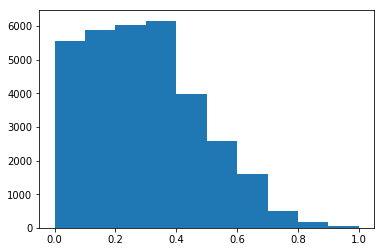

In [45]:
plt.hist(df_train["age"])

(array([5570., 5890., 6048., 6162., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

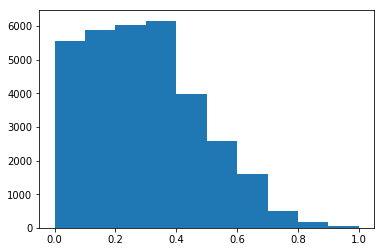

In [46]:
#Normalization of train
df_train["age"]=(df_train["age"]-df_train["age"].min())/(df_train["age"].max()-df_train["age"].min())
plt.hist(df_train["age"])

(array([2862., 2796., 3072., 2994., 1998., 1285.,  861.,  281.,  103.,
          29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

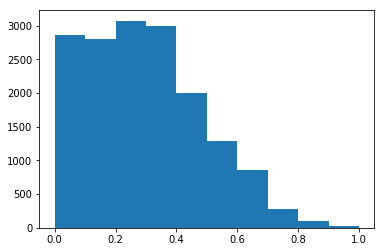

In [47]:
#Normalization of test
df_test["age"]=(df_test["age"]-df_test["age"].min())/(df_test["age"].max()-df_test["age"].min())
plt.hist(df_test["age"])

#### workclass

In [49]:
df_train["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            21
Name: workclass, dtype: int64

In [50]:
# never worked and without pay both are similer class so we mearge them
df_train["workclass"].replace("Never-worked","Without-pay",inplace=True)
df_test["workclass"].replace("Never-worked","Without-pay",inplace=True)

#### fnlwgt 

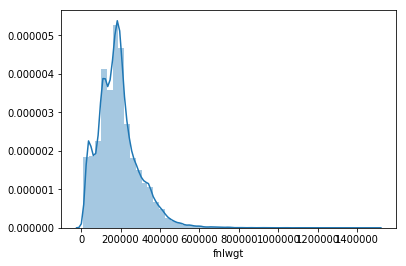

In [51]:
sns.distplot(df_train["fnlwgt"])

In [52]:
df_train["fnlwgt"].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

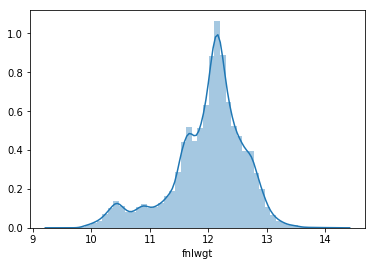

In [53]:
#it have large SD so we should take log for resuce SD
df_train["fnlwgt"]=np.log(df_train["fnlwgt"])
sns.distplot(df_train["fnlwgt"])

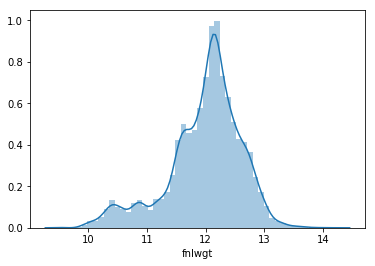

In [54]:
# in test
df_test["fnlwgt"]=np.log(df_test["fnlwgt"])
sns.distplot(df_test["fnlwgt"])

#### Education 

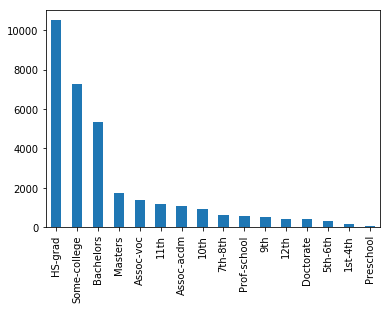

In [55]:
df_train["education"].value_counts().plot.bar()

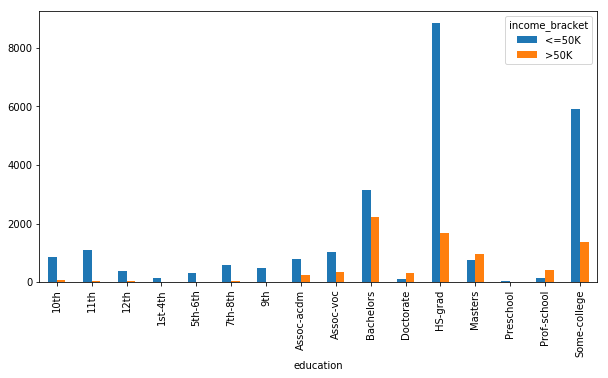

In [56]:
Edu=pd.crosstab(df_train["education"],df_train["income_bracket"])
Edu.plot(kind='bar',figsize=(10,5))

All primary education('1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th') have less data ad almost same result. So we can combine all in one

In [37]:
df_train["education"]=df_train["education"].apply(lambda x: "Primary" if x in ['1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'] else x)

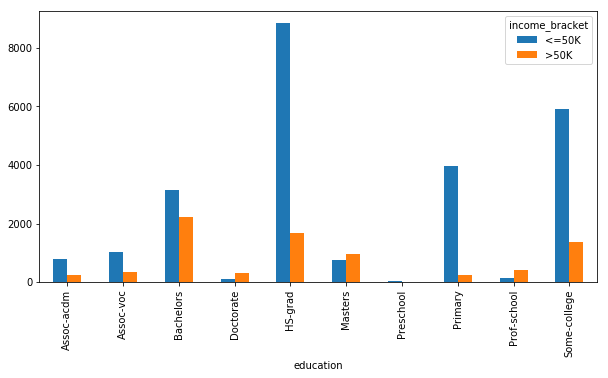

In [38]:
Edu=pd.crosstab(df_train["education"],df_train["income_bracket"])
Edu.plot(kind='bar',figsize=(10,5))

In [39]:
# chnage is test
df_test["education"]=df_test["education"].apply(lambda x: "Primary" if x in ['1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'] else x)

#### Education Number 

In [40]:
#df_train["education_num"]=df_train["education_num"].astype("int64")
#df_test["education_num"]=df_test["education_num"].astype("int64")

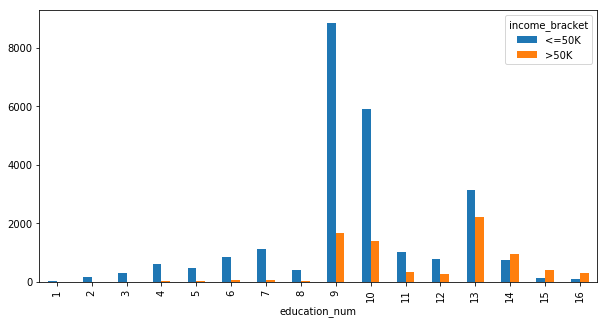

In [41]:
Edu=pd.crosstab(df_train["education_num"],df_train["income_bracket"])
Edu.plot(kind='bar',figsize=(10,5))

All thing is well

#### marital_status 

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


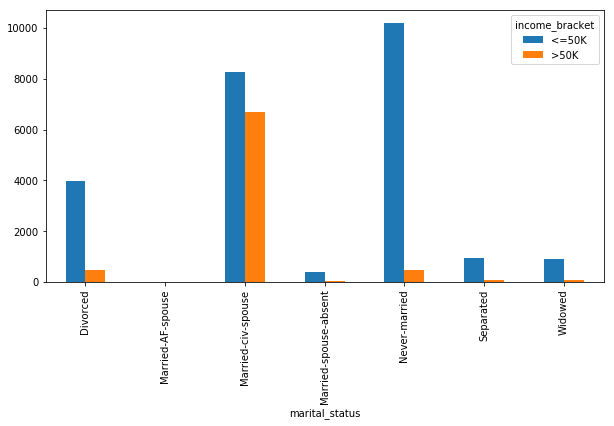

In [42]:
mar=pd.crosstab(df_train["marital_status"],df_train["income_bracket"])
mar.plot(kind='bar',figsize=(10,5))
print(df_train["marital_status"].value_counts())

No such need for any changes

#### Occupation 

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


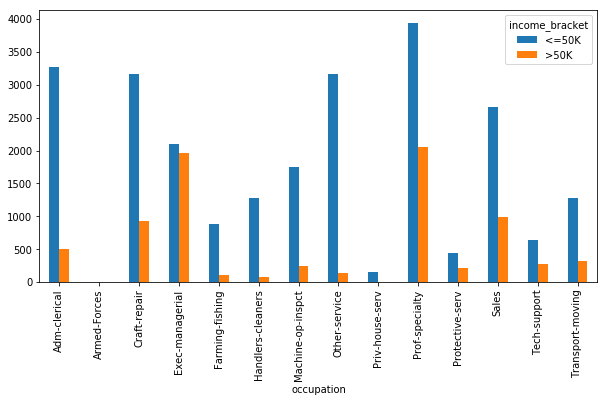

In [43]:
occ=pd.crosstab(df_train["occupation"],df_train["income_bracket"])
occ.plot(kind='bar',figsize=(10,5))
print(df_train["occupation"].value_counts())

No need

####  Relationship

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


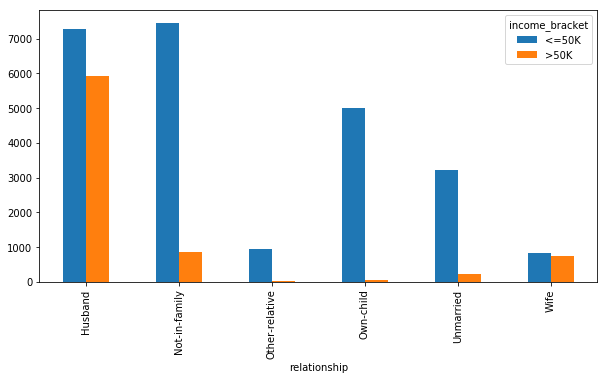

In [44]:
rel=pd.crosstab(df_train["relationship"],df_train["income_bracket"])
rel.plot(kind='bar',figsize=(10,5))
print(df_train["relationship"].value_counts())

No need

####  Race

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


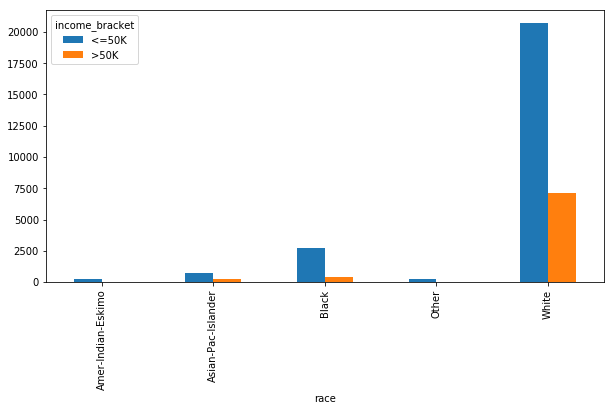

In [45]:
race=pd.crosstab(df_train["race"],df_train["income_bracket"])
race.plot(kind='bar',figsize=(10,5))
print(df_train["race"].value_counts())

####  gender

Male      21789
Female    10771
Name: gender, dtype: int64


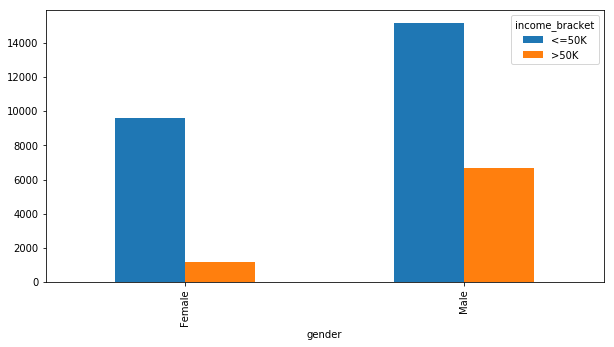

In [46]:
sex=pd.crosstab(df_train["gender"],df_train["income_bracket"])
sex.plot(kind='bar',figsize=(10,5))
print(df_train["gender"].value_counts())

#### hours_per_week

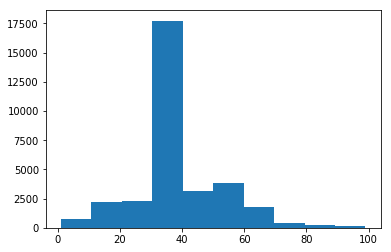

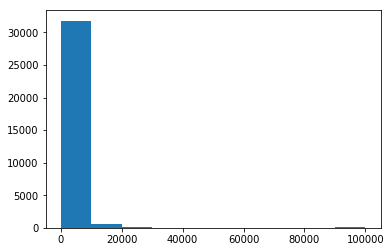

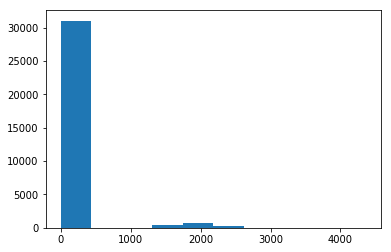

In [47]:
plt.hist(df_train["hours_per_week"])
plt.show()

plt.hist(df_train["capital_gain"])
plt.show()

plt.hist(df_train["capital_loss"])
plt.show()

Need to be Standarized


(array([3.179e+04, 5.170e+02, 8.700e+01, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.590e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

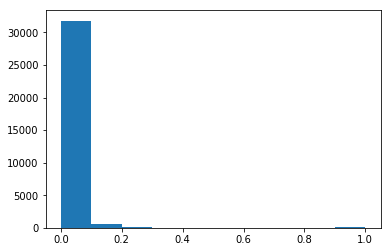

In [48]:
#capital gain train Normalization
df_train["capital_gain"]=(df_train["capital_gain"]-df_train["capital_gain"].min())/(df_train["capital_gain"].max()-df_train["capital_gain"].min())
plt.hist(df_train["capital_gain"])

In [49]:
#test
df_test["capital_gain"]=(df_test["capital_gain"]-df_test["capital_gain"].min())/(df_test["capital_gain"].max()-df_test["capital_gain"].min())

(array([3.1052e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

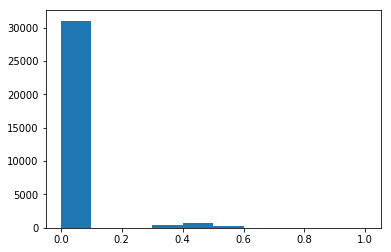

In [50]:
#capital_loss normalization train
df_train["capital_loss"]=(df_train["capital_loss"]-df_train["capital_loss"].min())/(df_train["capital_loss"].max()-df_train["capital_loss"].min())
plt.hist(df_train["capital_loss"])

In [51]:
#test
df_test["capital_loss"]=(df_test["capital_loss"]-df_test["capital_loss"].min())/(df_test["capital_loss"].max()-df_test["capital_loss"].min())

(array([  736.,  2192.,  2317., 17734.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

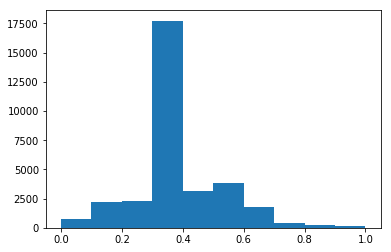

In [52]:
#hour_per_week normalization train
df_train["hours_per_week"]=(df_train["hours_per_week"]-df_train["hours_per_week"].min())/(df_train["hours_per_week"].max()-df_train["hours_per_week"].min())
plt.hist(df_train["hours_per_week"])

(array([ 389., 1136., 1081., 8904., 1552., 1951.,  846.,  235.,  113.,
          74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

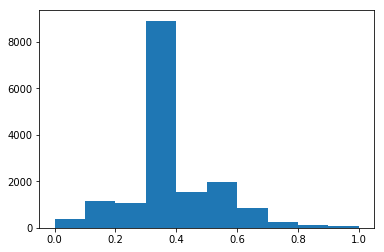

In [53]:
# test
df_test["hours_per_week"]=(df_test["hours_per_week"]-df_test["hours_per_week"].min())/(df_test["hours_per_week"].max()-df_test["hours_per_week"].min())
plt.hist(df_test["hours_per_week"])

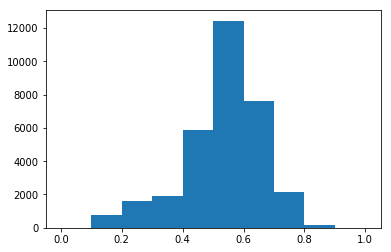

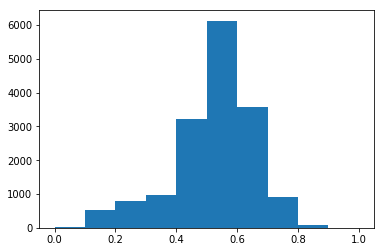

In [54]:
df_train["fnlwgt"]=(df_train["fnlwgt"]-df_train["fnlwgt"].min())/(df_train["fnlwgt"].max()-df_train["fnlwgt"].min())
plt.hist(df_train["fnlwgt"])
plt.show()

df_test["fnlwgt"]=(df_test["fnlwgt"]-df_test["fnlwgt"].min())/(df_test["fnlwgt"].max()-df_test["fnlwgt"].min())
plt.hist(df_test["fnlwgt"])
plt.show()


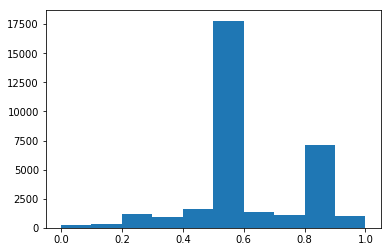

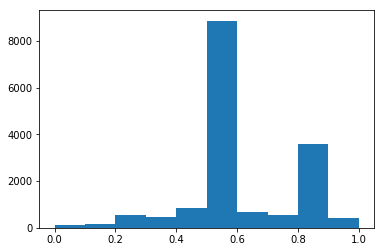

In [55]:
df_train["education_num"]=(df_train["education_num"]-df_train["education_num"].min())/(df_train["education_num"].max()-df_train["education_num"].min())
plt.hist(df_train["education_num"])
plt.show()


df_test["education_num"]=(df_test["education_num"]-df_test["education_num"].min())/(df_test["education_num"].max()-df_test["education_num"].min())
plt.hist(df_test["education_num"])
plt.show()

#### native_country


United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

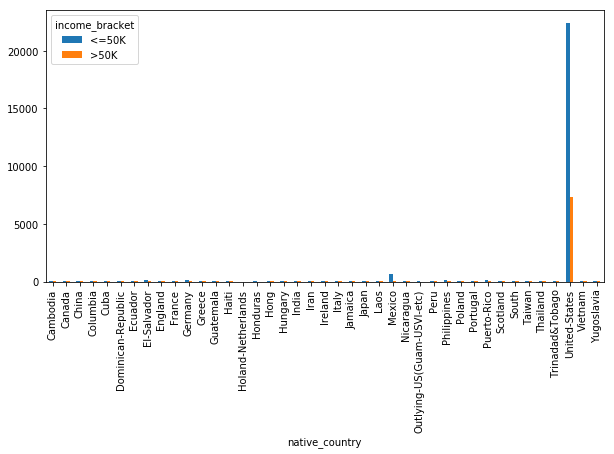

In [56]:
country=pd.crosstab(df_train["native_country"],df_train["income_bracket"])
country.plot(kind='bar',figsize=(10,5))
print(df_train["native_country"].value_counts())

there have lost of class and most of the class has less info. We need to be counter of these class. So we will do combine country based on there region

In [57]:
def native(country):
    if country in ['England', 'Germany', 'Canada', 'Italy', 'France', 'Greece', 'Philippines']:
        return 'Western'
    elif country in ['Mexico', 'Puerto-Rico', 'Honduras', 'Jamaica', 'Columbia', 'Laos', 'Portugal', 'Haiti',
                     'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                     'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Vietnam', 'Holand-Netherlands','Cuba']:
        return 'Poor'
    elif country in ['India', 'Iran', 'Cambodia', 'Taiwan', 'Japan', 'Yugoslavia', 'China', 'Hong']:
        return 'Eastern'
    elif country in ['South', 'Poland', 'Ireland', 'Hungary', 'Scotland', 'Thailand', 'Ecuador']:
        return 'Poland_country'
    elif country in ['United-States']:
        return 'US'
    else: 
        return country 

In [58]:
df_train["native_country"]=df_train["native_country"].apply(native)
df_test["native_country"]=df_test["native_country"].apply(native)

US                29752
Poor               1510
Western             677
Eastern             386
Poland_country      235
Name: native_country, dtype: int64


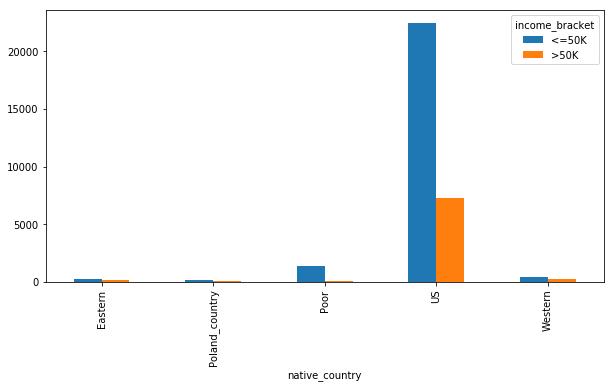

In [59]:
country=pd.crosstab(df_train["native_country"],df_train["income_bracket"])
country.plot(kind='bar',figsize=(10,5))
print(df_train["native_country"].value_counts())

Now its looking good 

In [60]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,0.452055,Self-emp-not-inc,0.399242,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,US,<=50K
1,0.287671,Private,0.597602,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,US,<=50K
2,0.493151,Private,0.615280,Primary,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,US,<=50K
3,0.150685,Private,0.691587,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Poor,<=50K
4,0.273973,Private,0.655456,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,US,<=50K


In [61]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1,0.109589,Private,0.599821,Primary,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,US,<=50K
2,0.287671,Private,0.402925,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,US,<=50K
3,0.150685,Local-gov,0.683963,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,US,>50K
4,0.369863,Private,0.526089,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,US,>50K
5,0.013699,Private,0.433066,Some-college,0.600000,Never-married,Prof-specialty,Own-child,White,Female,0.000000,0.0,0.295918,US,<=50K


Now feature Engineering is done

Let's start label encoding of catagorial variable

### apply Label encoder
For Desicion Tree Algo

In [62]:
from sklearn import preprocessing

In [63]:
catagorial_df_train=df_train.select_dtypes("object")
catagorial_df_train.head()

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,US,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,US,<=50K
2,Private,Primary,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,US,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Poor,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,US,<=50K


In [64]:
# apply Label encoder to df_categorical
le=preprocessing.LabelEncoder()

In [65]:
catagorial_df_train=catagorial_df_train.apply(le.fit_transform)

In [66]:
catagorial_df_train.head()

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
0,4,2,2,3,0,4,1,3,0
1,2,4,0,5,1,4,1,3,0
2,2,7,2,5,0,2,1,3,0
3,2,2,2,9,5,2,0,2,0
4,2,5,2,3,5,4,0,3,0


In [67]:
#concat catagorial_df_train to df_train
train=df_train.drop(catagorial_df_train.columns,axis=1)
train=pd.concat([train,catagorial_df_train],axis=1)

In [68]:
catagorial_df_test=df_test.select_dtypes("object")
catagorial_df_test=catagorial_df_test.apply(le.fit_transform)
test=df_test.drop(catagorial_df_train.columns,axis=1)
test=pd.concat([test,catagorial_df_test],axis=1)
test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
1,0.109589,0.599821,0.400000,0.000000,0.0,0.397959,2,7,4,6,3,2,1,3,0
2,0.287671,0.402925,0.533333,0.000000,0.0,0.500000,2,4,2,4,0,4,1,3,0
3,0.150685,0.683963,0.733333,0.000000,0.0,0.397959,1,0,2,10,0,4,1,3,1
4,0.369863,0.526089,0.600000,0.076881,0.0,0.397959,2,9,2,6,0,2,1,3,1
5,0.013699,0.433066,0.600000,0.000000,0.0,0.295918,2,9,4,9,3,4,0,3,0


In [69]:
train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income_bracket
0,0.452055,0.399242,0.800000,0.0,0.0,0.122449,4,2,2,3,0,4,1,3,0
1,0.287671,0.597602,0.533333,0.0,0.0,0.397959,2,4,0,5,1,4,1,3,0
2,0.493151,0.615280,0.400000,0.0,0.0,0.397959,2,7,2,5,0,2,1,3,0
3,0.150685,0.691587,0.800000,0.0,0.0,0.397959,2,2,2,9,5,2,0,2,0
4,0.273973,0.655456,0.866667,0.0,0.0,0.397959,2,5,2,3,5,4,0,3,0


In [70]:
train.dtypes

age               float64
fnlwgt            float64
education_num     float64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
workclass           int32
education           int32
marital_status      int32
occupation          int32
relationship        int32
race                int32
gender              int32
native_country      int32
income_bracket      int32
dtype: object

In [84]:
train["income_bracket"]=train["income_bracket"].astype("int64")

Get X_trainD,Y_trainD,X_testD,Y_testD

In [85]:
X_trainD=train.drop("income_bracket",axis=1)
Y_trainD=train["income_bracket"]

X_testD=test.drop("income_bracket",axis=1)
Y_testD=test["income_bracket"]

In [86]:
print(X_trainD.shape)
print(Y_trainD.shape)
print(X_testD.shape)
print(Y_testD.shape)

(32560, 14)
(32560,)
(16281, 14)
(16281,)


In [83]:
X_trainD.occupation.dtype

dtype('int32')

In [81]:
Y_trainD.h

0    0
1    0
2    0
3    0
4    0
Name: income_bracket, dtype: object

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

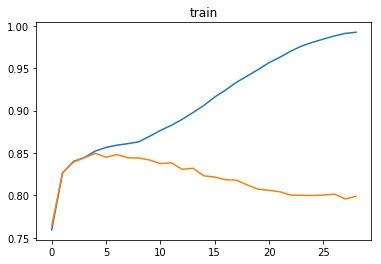

In [88]:
accuracy_list_train=[]
accuracy_list_test=[]
for i in range(1,30):
    dt_default = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt_default.fit(X_trainD, Y_trainD)
    Y_trainD_pred=dt_default.predict(X_trainD)
    Y_testD_pred=dt_default.predict(X_testD)
    accuracy_list_train.append(accuracy_score(Y_trainD_pred,Y_trainD))
    accuracy_list_test.append(accuracy_score(Y_testD_pred,Y_testD))
plt.plot(accuracy_list_train)
plt.title("train")
plt.plot(accuracy_list_test)
plt.show()

We can see there max depth around 4 is giving good performance

In [89]:
dt_default = DecisionTreeClassifier(max_depth=4)
dt_default.fit(X_trainD, Y_trainD)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
Y_trainD_pred=dt_default.predict(X_trainD)
Y_testD_pred=dt_default.predict(X_testD)

In [91]:
accuracy_score(Y_trainD_pred,Y_trainD)

0.844502457002457

In [92]:
confusion_matrix(Y_trainD_pred,Y_trainD)

array([[23406,  3750],
       [ 1313,  4091]], dtype=int64)

In [93]:
accuracy_score(Y_testD_pred,Y_testD)

0.8442356120631411

In [94]:
# Confusion Matrix
confusion_matrix(Y_testD_pred,Y_testD)

array([[11775,  1876],
       [  660,  1970]], dtype=int64)

#### RandomForestClassifier 

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)  # n_estimators : no. of tree

In [96]:
rf.fit(X_trainD, Y_trainD)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
Y_trainD_pred=rf.predict(X_trainD)
Y_testD_pred=rf.predict(X_testD)
print(accuracy_score(Y_trainD_pred,Y_trainD))
print(accuracy_score(Y_testD_pred,Y_testD))

0.8472051597051597
0.843252871445243


In [98]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5),X_trainD,Y_trainD,cv=5).mean()

In [99]:
print(acc)

0.8457924289721033


This is solved by cross validation with RandomForest

In [100]:
acc_list=[]
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_trainD,Y_trainD,cv=5).mean()
    acc_list.append(acc)

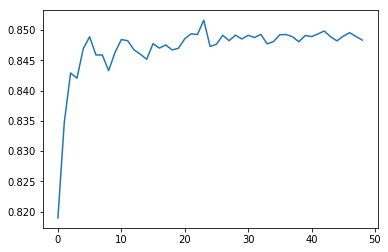

In [101]:
plt.plot(acc_list)
plt.show()

In [102]:
print(np.argmax(acc_list))

23


Means 30 tree gives best result 

In [103]:
rf = RandomForestClassifier(n_estimators=30,max_depth=5,criterion='entropy')
rf.fit(X_trainD,Y_trainD)
print(rf.score(X_trainD,Y_trainD))
print(rf.score(X_testD,Y_testD))

0.8507371007371007
0.8430686075793871


Now we do another algo for solve classification problem : Logistic Regrassion

## Encoding by dummies
#### For Logistic Regression

In [104]:
df_train["income_bracket"]=df_train["income_bracket"].apply(lambda x: 0 if x =="<=50K" else 1)

In [105]:
df_train["income_bracket"]=df_train["income_bracket"].astype("object")

In [106]:
df_test["income_bracket"]=df_test["income_bracket"].apply(lambda x: 0 if x =="<=50K" else 1)
df_test["income_bracket"]=df_test["income_bracket"].astype("object")

In [107]:
catagorial_df_train=df_train.select_dtypes("object")
catagorial_df_train.drop("income_bracket",axis=1,inplace=True)

In [108]:
#train
train_dummies=df_train.drop(catagorial_df_train.columns,axis=1)
train_dummies=pd.concat([train_dummies,pd.get_dummies(catagorial_df_train)],axis=1)
train_dummies.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_bracket,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,race_Black,race_Other,race_White,gender_Female,gender_Male,native_country_Eastern,native_country_Poland_country,native_country_Poor,native_country_US,native_country_Western
0,0.452055,0.399242,0.800000,0.0,0.0,0.122449,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.287671,0.597602,0.533333,0.0,0.0,0.397959,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0.493151,0.615280,0.400000,0.0,0.0,0.397959,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0.150685,0.691587,0.800000,0.0,0.0,0.397959,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,0.273973,0.655456,0.866667,0.0,0.0,0.397959,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [109]:
train_dummies.income_bracket=train_dummies["income_bracket"].astype("uint8")

In [110]:
#test
catagorial_df_test=df_test.select_dtypes("object")
catagorial_df_test.drop("income_bracket",axis=1,inplace=True)
test_dummies=df_test.drop(catagorial_df_test.columns,axis=1)
test_dummies=pd.concat([test_dummies,pd.get_dummies(catagorial_df_test)],axis=1)
test_dummies.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_bracket,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,race_Black,race_Other,race_White,gender_Female,gender_Male,native_country_Eastern,native_country_Poland_country,native_country_Poor,native_country_US,native_country_Western
1,0.109589,0.599821,0.400000,0.000000,0.0,0.397959,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0.287671,0.402925,0.533333,0.000000,0.0,0.500000,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,0.150685,0.683963,0.733333,0.000000,0.0,0.397959,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,0.369863,0.526089,0.600000,0.076881,0.0,0.397959,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,0.013699,0.433066,0.600000,0.000000,0.0,0.295918,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [111]:
test_dummies.income_bracket=test_dummies["income_bracket"].astype("uint8")

## Model Building and Evaluation

Get X_train, Y_train

Logistic

In [112]:
X_train=train_dummies.drop("income_bracket",axis=1)
Y_train=train_dummies["income_bracket"]

X_test=test_dummies.drop("income_bracket",axis=1)
Y_test=test_dummies["income_bracket"]

In [113]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(32560, 62)
(32560,)
(16281, 62)
(16281,)


In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
Y_test_pred=logistic_model.predict(X_test)

In [117]:
accuracy_score(Y_test_pred,Y_test)

0.8506848473680978

In [118]:
Y_train_pred=logistic_model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.8503992628992629